# Fierce Research Safe-To-Buy (STB) Model

The CBOE Volatility Index is a useful tool to gauge the level of fear in the market. When market participants are worried, they load up on options and drive up the implied volatility (IV), hence why the VIX rises when equities fall. 

Since the VIX exhibits strong mean-reverting behaviour, the base case is to assume that it will continue to decline until it reaches its mean of 20. However, until then, it may bounce around different ranges. Since the year 2020 is filled with the most unexpected events, it is reasonable to see the VIX being elevated. In fact, with the political uncertainty in the US, Q3 and Q4 may provide us with several spikes in the VIX. 

I wanted to explore the SPY average returns following a spike in the VIX for the following 1-month and 3-month following the event. I bucketed the VIX in the following groups: Below 15, >15 & <25, >25 & <35, >35 & <45, and >45, and computed the mean return for each range. 

See below the Fierce Research Safe-To-Buy Model.

In [40]:
import numpy as np
import pandas as pd

#Charting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark-palette')
import seaborn as sns

#Ignore Warnings
import warnings 
warnings.filterwarnings('ignore')

In [41]:
#Import App Key
import eikon as tr
tr.set_app_key('DEFAULT_CODE_BOOK_APP_KEY')

start_date = '0'
end_date = '-170'

ric1 = 'SPY'
ric2 = '.vix'

df1, e= tr.get_data([ric1,ric2],['tr.priceclose.date','tr.priceclose'],
                       {'SDate':start_date,'EDate':end_date,'Frq':'M'})

df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True) 
df1.index = df1.index.map(lambda t: t.strftime('%Y-%m-%d'))
df1.columns = map(str.lower, df1.columns)
df1 = df1.drop_duplicates()

In [42]:
df1 = df1.pivot(columns='instrument', values=['price close'])
df1['spy'] = df1['price close']['SPY']
df1['vix'] = df1['price close']['.VIX']

#### Calculate SPY Monthly Price Return

In [43]:
df1['spy 1mo return'] = (((df1['spy']-df1['spy'].shift(1))/df1['spy'].shift(1))*100).round(2)

In [44]:
df1 = df1[['vix','spy 1mo return']]

In [45]:
df1 = df1.dropna()

#### DataFrame With SPY 1-Month Return and VIX Index

In [46]:
df1

,vix,spy 1mo return
instrument,,
2006-06-30,13.08,-0.22
2006-07-31,14.95,0.49
2006-08-31,12.31,2.18
2006-10-31,11.10,3.15
2006-11-30,10.91,1.99
...,...,...
2020-02-28,40.11,-7.92
2020-03-31,53.54,-13.00
2020-04-30,34.15,12.70


#### Descriptive Statistics

The monthly mean for the VIX index is 20, where the average SPY price monthly return is 0.54%.

In [47]:
df1.describe().round(2)

,vix,spy 1mo return
instrument,,
count,163.00,163.00
mean,19.59,0.53
std,8.98,4.34
min,9.51,-16.52
25%,13.74,-1.78
50%,16.95,1.29
75%,22.90,3.17
max,59.89,12.70


#### Distribution, and Fat Tail 

By looking at charts below, we can observe that the spy monthly return distribution has a fat left tail, and the VIX has a very strong fat right tail.

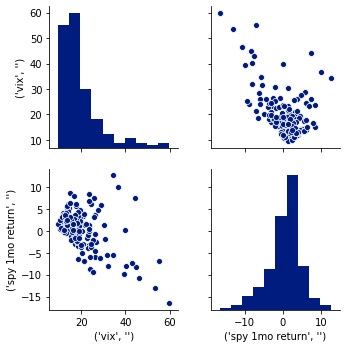

In [48]:
sns.pairplot(df1);

#### SPY Average Monthly Price Return With Positive VS Negative VIX

In [49]:
df1['pos/neg'] = np.where(df1['spy 1mo return']>0, 1,0)

In [50]:
df1.groupby(['pos/neg']).mean().round(2)

,vix,spy 1mo return
instrument,,
pos/neg,,
0,24.70,-3.89
1,16.77,2.98


#### VIX Grouping 

In [51]:
vix_group = []
for x in df1['vix']:
    if x < 15:
        vix_group.append('Below 15')
    elif x < 25:
        vix_group.append('>15<25')
    elif x < 35:
        vix_group.append('>25<35')
    elif x < 45:
        vix_group.append('>35<45')
    else:
        vix_group.append('>45')
df1['vix group'] = vix_group
df1 = df1[['vix group','vix','spy 1mo return']]

#### Shift 1-Month SPY Price Return

In [52]:
df1['spy return +1 month'] = df1['spy 1mo return'].shift(-1)
df1['spy return +3 months'] = df1['spy 1mo return'].shift(-1)+df1['spy 1mo return'].shift(-2)+df1['spy 1mo return'].shift(-3)

The table below represents the vix, the 1-month return, 1-month return 1 month later, and 3-month return 3 months later. 

When the VIX spikes, the worst current moment return for the S&P 500 is above the 45 level as expected. However, the best 1-month return is observed the following month, which makes sense as the market bounces back from the lows. 

When looking at the 3-month return 3 months later, the 25-35 level in VIX offers the best return for that period, followed by the 45 level.  

In [53]:
df1.groupby(['vix group']).mean().round(2)

,vix,spy 1mo return,spy return +1 month,spy return +3 months
instrument,,,,
vix group,,,,
>15<25,18.85,0.38,0.57,1.19
>25<35,28.43,-0.74,1.54,4.52
>35<45,41.13,-2.26,-4.61,1.96
>45,53.76,-11.80,3.37,2.09
Below 15,12.76,2.35,0.63,1.21


In summary, as investors, we should have robust risk management practices to raise cash when the market weakens so that we have the dry powder to buy the dip during the crash. As a result, the best 3-month return occurred when the VIX spiked to the 25-35 area. The VIX is currently trading around 28.

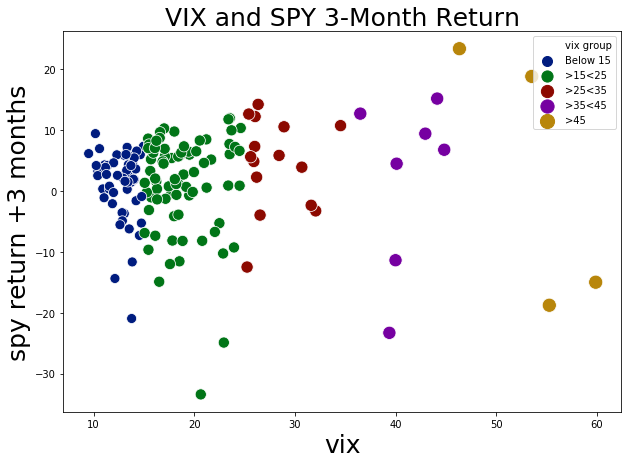

In [54]:
fig = plt.figure(figsize=(10,7))
plt.title('VIX and SPY 3-Month Return',size=25)
plt.xlabel(' ',size=25)
plt.ylabel(' ',size=25)
sns.scatterplot(x=df1['vix'],y=df1['spy return +3 months'],hue=df1['vix group'],size=df1['vix group'],sizes=(200,100));

Good luck with the market! Guillaume, Fierce Research